In [0]:
#necessary imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

Using TensorFlow backend.


In [0]:
import glob
import cv2

#Import Images in order
filenames = glob.glob("/content/drive/My Drive/Colab Notebooks/Project/Project Data/Images/*.tif")
filenames.sort()

images = []
for img in filenames:
    n = cv2.imread(img)
    images.append(n)
print ('>loaded %s' % filenames)

#Import Labels in order
filenames_labels = glob.glob("/content/drive/My Drive/Colab Notebooks/Project/Project Data/Labels/*.tif")
filenames_labels.sort()

images_labels = []
for img_labels in filenames_labels:
    n_labels = cv2.imread(img_labels)
    images_labels.append(n_labels)
print ('>loaded %s' % filenames_labels)    

x_train = tf.stack(images)
y_train = tf.stack(images_labels)

#Normalize to max value
x_train = x_train/255
y_train = y_train/255 

#print(x_train.shape, y_train.shape)

x_train = tf.cast(x_train, np.float32)
y_train = tf.cast(y_train, np.float32)

#Crop to appropriate size for the model 
x_train = x_train[:, 0:512, 0:512, :]
y_train = y_train[:, 0:512, 0:512, :]

y_train = y_train[:,:,:,0]
#print(y_train.shape)

y_train = y_train[..., None]
#print(y_train.shape)
print(x_train.shape, y_train.shape)

>loaded ['/content/drive/My Drive/Colab Notebooks/Project/Project Data/Images/aria_a_10_10.tif', '/content/drive/My Drive/Colab Notebooks/Project/Project Data/Images/aria_a_10_27.tif', '/content/drive/My Drive/Colab Notebooks/Project/Project Data/Images/aria_a_11_30.tif', '/content/drive/My Drive/Colab Notebooks/Project/Project Data/Images/aria_a_11_6.tif', '/content/drive/My Drive/Colab Notebooks/Project/Project Data/Images/aria_a_12_15.tif', '/content/drive/My Drive/Colab Notebooks/Project/Project Data/Images/aria_a_12_34.tif', '/content/drive/My Drive/Colab Notebooks/Project/Project Data/Images/aria_a_13_2.tif', '/content/drive/My Drive/Colab Notebooks/Project/Project Data/Images/aria_a_13_22.tif', '/content/drive/My Drive/Colab Notebooks/Project/Project Data/Images/aria_a_14_11.tif', '/content/drive/My Drive/Colab Notebooks/Project/Project Data/Images/aria_a_14_19.tif', '/content/drive/My Drive/Colab Notebooks/Project/Project Data/Images/aria_a_15_35.tif', '/content/drive/My Drive/

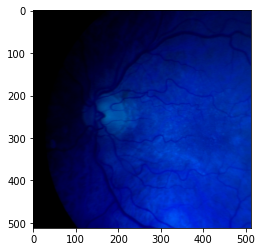

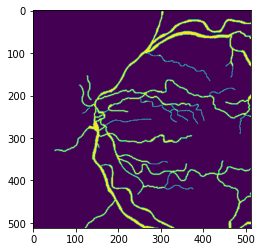

In [0]:
#Check to make sure data has loaded in correctly
train_data_plot = tf.squeeze(x_train[1])
plt.imshow(train_data_plot)

plt.show()

train_label_plot = tf.squeeze(y_train[1])
plt.imshow(train_label_plot)

plt.show()

In [0]:
class UNet(tf.keras.models.Model):
  def __init__(self):
    super().__init__()

    self.layer1 = tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu')
    self.layer2 = tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu')
    self.pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
    self.layer3 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')
    self.layer4 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')
    self.pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))
    self.layer5 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu')
    self.layer6 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu')
    self.pool3 = tf.keras.layers.MaxPooling2D(pool_size = (2,2))
    self.layer7 = tf.keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu')
    self.layer8 = tf.keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu')
    self.pool4 = tf.keras.layers.MaxPooling2D(pool_size = (2,2))
    self.layer9 = tf.keras.layers.Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu')
    self.layer10 = tf.keras.layers.Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu')
    self.transposeconv1 = tf.keras.layers.Conv2DTranspose(filters=128, kernel_size = 3, strides=2, padding='same', activation = 'relu')
    self.dropout1 = tf.keras.layers.Dropout(0.1) 
    self.layer11 = tf.keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu')
    self.layer12 = tf.keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu')
    self.transposeconv2 = tf.keras.layers.Conv2DTranspose(filters=64, kernel_size = 3, strides=2, padding='same', activation = 'relu')
    self.dropout2 = tf.keras.layers.Dropout(0.1)
    self.layer13 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu')
    self.layer14 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu')
    self.transposeconv3 = tf.keras.layers.Conv2DTranspose(filters=32, kernel_size = 3, strides=2, padding='same', activation = 'relu')
    self.dropout3 = tf.keras.layers.Dropout(0.1)
    self.layer15 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')
    self.layer16 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')
    self.transposeconv4 = tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding='same', activation = 'relu')
    self.dropout4 = tf.keras.layers.Dropout(0.1)
    self.layer17 = tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu')
    self.layer18 = tf.keras.layers.Conv2D(filters=16,kernel_size=3, strides=1, padding='same', activation='relu') 
    self.layer19 = tf.keras.layers.Conv2D(filters=1, kernel_size=1, strides=1, padding='same', activation='sigmoid')#changed from linear to sigmoid 
  
  def call(self, input):  
    x1 = self.layer1(input)
    #print('input', input.shape)
    x2 = self.layer2(x1)
    #print('x1', x1.shape)
    p1 = self.pool1(x2)
    #print('x2', x2.shape)
    x3 = self.layer3(p1)
    #print('p1', p1.shape) 
    x4 = self.layer4(x3)
    #print('x3', x3.shape)
    p2 = self.pool2(x4)
    #print('x4', x4.shape)
    x5 = self.layer5(p2)
    #print('p2', p2.shape)
    x6 = self.layer6(x5)
    #print('x5', x5.shape)
    p3 = self.pool3(x6)
    #print('x6', x6.shape)
    x7 = self.layer7(p3)
    #print('p3', p3.shape)
    x8 = self.layer8(x7)
    #print('x7', x7.shape)
    p4 = self.pool4(x8)
    #print('x8', x8.shape)
    x9 = self.layer9(p4)
    #print('p4', p4.shape)
    x10 = self.layer10(x9)
    #print('x9', x9.shape)
    t1 = self.transposeconv1(x10)
    #print('t1', t1.shape)
    #print('x10', x10.shape)
    s1 = tf.keras.layers.Concatenate(axis=-1)([t1, x8])
    #print('s1', s1.shape)
    d1 = self.dropout1(s1)
    #print('d1', d1.shape)
    x11 = self.layer11(d1)
    x12 = self.layer12(x11)
    #print('x11', x11.shape)
    t2 = self.transposeconv2(x12)
    #print('x12', x12.shape)
    #print('t2', t2.shape)
    s2 = tf.keras.layers.Concatenate(axis=-1)([t2, x6]) 
    #print('s2', s2.shape)
    d2 = self.dropout2(s2)
    x13 = self.layer13(d2)
    #print('d2', d2.shape)
    x14 = self.layer14(x13)
    #print('x13', x13.shape)
    t3 = self.transposeconv3(x14)
    #print('x14', x14.shape)
    #print('t3', t3.shape)
    s3 = tf.keras.layers.Concatenate(axis=-1)([t3, x4])
    #print('s3', s3.shape)
    d3 = self.dropout3(s3)
    x15 = self.layer15(d3)
    #print('d3', d3.shape)
    x16 = self.layer16(x15)
    #print('x15', x15.shape)
    t4 = self.transposeconv4(x16)
    #print('x16', x16.shape)
    s4 = tf.keras.layers.Concatenate(axis=-1)([t4, x2])
    #print('s4', s4.shape)
    d4 = self.dropout4(s4)
    #print('t4', t4.shape)
    x17 = self.layer17(d4)
    #print('d4', d4.shape)
    x18 = self.layer18(x17)
    #print('x17', x17.shape)
    x19 = self.layer19(x18)
    #print('x18', x18.shape)
    #print('x19', x19.shape)

    return self.layer19(x18)

model = UNet()



In [0]:
model.compile(optimizer='adam',  # Optimizer
              loss='binary_crossentropy',  # Loss
                      metrics=['accuracy'])  # Metric to monitor

model.fit(
    x_train, y_train,
    validation_split = 0.2,
    batch_size=16,
    epochs=30)

Epoch 1/30
7/7 [==============================] - 262s 37s/step - loss: 0.5615 - accuracy: 0.9070 - val_loss: 0.3934 - val_accuracy: 0.9244
Epoch 2/30
7/7 [==============================] - 260s 37s/step - loss: 0.3795 - accuracy: 0.9130 - val_loss: 0.3362 - val_accuracy: 0.9244
Epoch 3/30
7/7 [==============================] - 259s 37s/step - loss: 0.3460 - accuracy: 0.9130 - val_loss: 0.3060 - val_accuracy: 0.9244
Epoch 4/30
7/7 [==============================] - 260s 37s/step - loss: 0.3140 - accuracy: 0.9130 - val_loss: 0.2677 - val_accuracy: 0.9244
Epoch 5/30
7/7 [==============================] - 262s 37s/step - loss: 0.2887 - accuracy: 0.9130 - val_loss: 0.2623 - val_accuracy: 0.9244
Epoch 6/30
7/7 [==============================] - 263s 38s/step - loss: 0.2881 - accuracy: 0.9130 - val_loss: 0.2684 - val_accuracy: 0.9244
Epoch 7/30
7/7 [==============================] - 268s 38s/step - loss: 0.2883 - accuracy: 0.9130 - val_loss: 0.2632 - val_accuracy: 0.9244
Epoch 8/30
7/7 [====

In [0]:
# Predict on training images
preds_train = model.predict(x_train, verbose=1)

5/5 [==============================] - 62s 12s/step


In [0]:
def plot_sample(x, y, preds, ix=None):
    """Function to plot the results"""
    if ix is None:
        ix = random.randint(0, len(X))

    fig, ax = plt.subplots(1, 3, figsize=(20, 10))
    ax[0].imshow(x[ix, ..., 0], cmap='gray')
    #ax[0].contour(tf.squeeze(y[ix]))#, colors='k', levels=[0.5])
    ax[0].set_title('Original Image')

    ax[1].imshow(tf.squeeze(y)[ix])
    ax[1].set_title('Ground Truth Mask')

    ax[2].imshow(tf.squeeze(preds[ix]))
    #ax[2].contour(tf.squeeze(y[ix]))#, colors='k', levels=[0.5]))
    ax[2].set_title('UNet Predicted Mask')

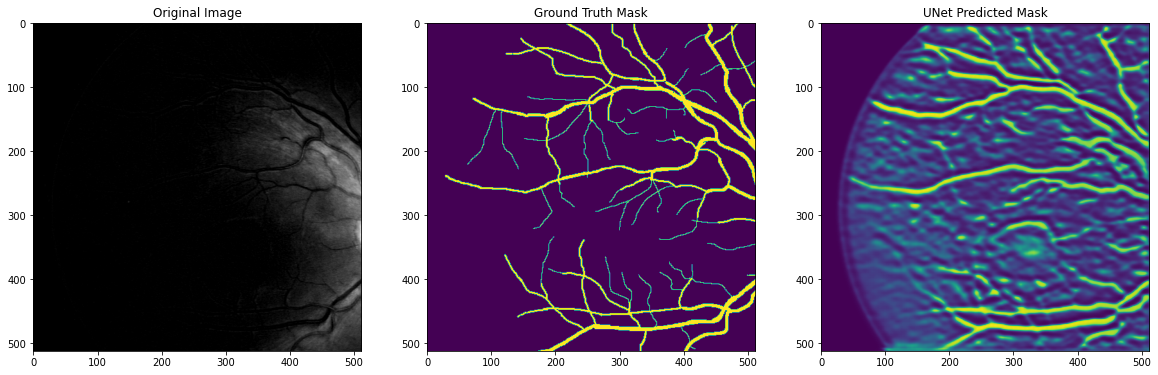

In [0]:
# Look at data and output
plot_sample(x_train, y_train, preds_train, ix=35)

In [0]:
# Save the weights
model.save_weights('/content/drive/My Drive/Colab Notebooks/Project/Project Data/Checkpoint_exp3')

In [0]:
model.compile(
  'adam',
  loss='binary_crossentropy',
  metrics=[tf.keras.metrics.MeanIoU(num_classes=2)])

Epoch 1/30
7/7 [==============================] - 261s 37s/step - loss: 0.2738 - mean_io_u_1: 0.4566 - val_loss: 0.2350 - val_mean_io_u_1: 0.4622
Epoch 2/30
7/7 [==============================] - 261s 37s/step - loss: 0.2556 - mean_io_u_1: 0.4566 - val_loss: 0.2276 - val_mean_io_u_1: 0.4622
Epoch 3/30
7/7 [==============================] - 260s 37s/step - loss: 0.2499 - mean_io_u_1: 0.4566 - val_loss: 0.2252 - val_mean_io_u_1: 0.4622
Epoch 4/30
7/7 [==============================] - 260s 37s/step - loss: 0.2488 - mean_io_u_1: 0.4566 - val_loss: 0.2165 - val_mean_io_u_1: 0.4622
Epoch 5/30
7/7 [==============================] - 260s 37s/step - loss: 0.2423 - mean_io_u_1: 0.4566 - val_loss: 0.2126 - val_mean_io_u_1: 0.4622
Epoch 6/30
7/7 [==============================] - 263s 38s/step - loss: 0.2403 - mean_io_u_1: 0.4566 - val_loss: 0.2119 - val_mean_io_u_1: 0.4622
Epoch 7/30
7/7 [==============================] - 271s 39s/step - loss: 0.2398 - mean_io_u_1: 0.4566 - val_loss: 0.2217 - va

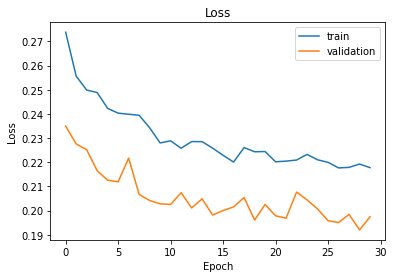

KeyError: ignored

In [0]:
history = model.fit(
    x_train, y_train,
    validation_split = 0.2,
    batch_size=16,
    epochs=30) #add in calbacks, can be image visualization, IoU etc

plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["train", "validation"], loc="upper right")
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.ylabel("Acc")
plt.xlabel("Epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

# plt.plot(history.history['MeanIoU']) #???
# plt.plot(history.history['val_MeanIoU'])
# plt.title("Intersection over Union")
# plt.ylabel("IoU")
# plt.xlabel("Epoch")
# plt.legend(["train", "validation"], loc="upper right")
# plt.show()

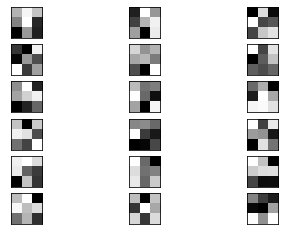

In [0]:
# # retrieve weights from the 1st hidden layer
# filters, biases = model.layers[0].get_weights()

# retrieve weights from the 2nd hidden layer
filters, biases = model.layers[1].get_weights()

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = plt.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
plt.show()

(576, 768, 3)
(1, 512, 512, 3)


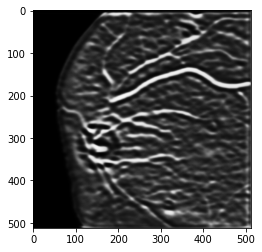

In [0]:
# load one image
img3 = cv2.imread('/content/drive/My Drive/Colab Notebooks/Project/Project Data/Images/aria_d_24_21.tif')

#process image
img3 = img3/255
print(img3.shape)

img3 = tf.cast(img3, np.float32)
img3 = img3[0:512, 0:512, :]

# expand dimensions so that it represents a single 'sample'
img3 = img3[None,...]

print(img3.shape)

# get feature map for first hidden layer
feature_maps = model.predict(img3)

plt.imshow(feature_maps[0, :, :, 0], cmap='gray')
plt.show()


In [0]:
# Save the weights
model.save_weights('/content/drive/My Drive/Colab Notebooks/Project/Project Data/Checkpoint_exp2_2')

In [0]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('/content/drive/My Drive/Colab Notebooks/Project/Project Data/my_saved_model2') 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Project/Project Data/my_saved_model2/assets


In [0]:
################################################################################################################################################